In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import gc

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Machine Learning Final Project/data/malicious_urls.csv')
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
mal_type = {'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3}
df['label'] = [mal_type[item] for item in df['type']]
df

,url,type,label
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(df['type'])
encoded_Y = encoder.transform(df['type'])
hot = np_utils.to_categorical(encoded_Y)

print(df['type'],)

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import *
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



vectorizer = HashingVectorizer(n_features = 500)
vector = vectorizer.fit_transform(df['url'])
vector = vector.toarray()
labels = df['label']
X_train, X_test, y_train, y_test = train_test_split(vector, hot, test_size=0.33, random_state=42)






In [ ]:
model = Sequential()
model.add(Dense(90, input_shape = (None,vector.shape[1]), activation = 'softmax'))
model.add(Dense(50, activation='relu', kernel_initializer="uniform"))
model.add(Dense(24, activation='relu', kernel_initializer="uniform"))
model.add(Dense(12, activation='relu', kernel_initializer="uniform"))
model.add(Dense(4, activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, validation_split = 0.33, epochs = 150, batch_size = 5000)

(436297, 500) (436297, 4)
Epoch 1/150
59/59 [==============================] - 4s 53ms/step - loss: 1.3393 - accuracy: 0.6565 - val_loss: 1.2333 - val_accuracy: 0.6576
Epoch 2/150
59/59 [==============================] - 3s 48ms/step - loss: 1.0638 - accuracy: 0.6565 - val_loss: 0.9947 - val_accuracy: 0.6576
Epoch 3/150
59/59 [==============================] - 3s 48ms/step - loss: 0.9868 - accuracy: 0.6565 - val_loss: 0.9757 - val_accuracy: 0.6576
Epoch 4/150
59/59 [==============================] - 3s 47ms/step - loss: 0.9393 - accuracy: 0.6565 - val_loss: 0.8575 - val_accuracy: 0.6576
Epoch 5/150
59/59 [==============================] - 3s 47ms/step - loss: 0.7446 - accuracy: 0.7276 - val_loss: 0.6645 - val_accuracy: 0.7683
Epoch 6/150
59/59 [==============================] - 3s 47ms/step - loss: 0.6144 - accuracy: 0.7745 - val_loss: 0.5727 - val_accuracy: 0.7799
Epoch 7/150
59/59 [==============================] - 3s 48ms/step - loss: 0.5481 - accuracy: 0.7853 - val_loss: 0.5280 - v

In [ ]:
from sklearn.metrics import confusion_matrix
label_predict = model.predict(X_test)
rounded = (label_predict  > 0.5).astype(int)
scores = model.evaluate(X_test,y_test)

6716/6716 [==============================] - 10s 1ms/step - loss: 0.2253 - accuracy: 0.9256


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rounded, target_names=['Benign', 'Defacement', 'Phishing', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.87      0.99      0.93    141516
  Defacement       0.95      0.98      0.96     31608
    Phishing       0.84      0.93      0.88     10694
     Malware       0.21      0.96      0.34     31076

   micro avg       0.60      0.98      0.75    214894
   macro avg       0.72      0.97      0.78    214894
weighted avg       0.79      0.98      0.85    214894
 samples avg       0.68      0.98      0.78    214894



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test = np.round(label_predict, 1)
rounded = (label_predict  > 0.5).astype(int)
correct = (rounded == y_test)
cm = confusion_matrix(y_test, rounded)

[[ True  True  True False]
 [ True  True  True  True]
 [ True  True  True  True]
 ...
 [ True  True  True  True]
 [ True  True  True False]
 [False  True  True  True]]


In [ ]:
import seaborn as sns
import numpy as np
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


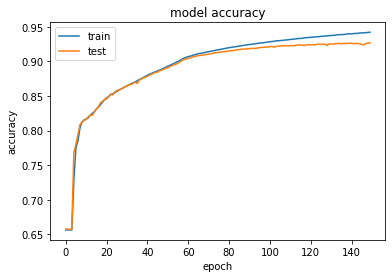

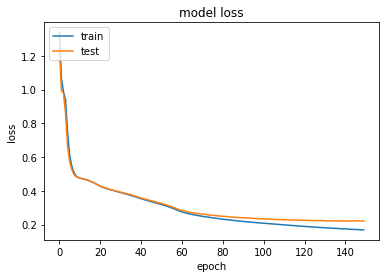

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
